In [1]:
# https://suhyun72.tistory.com/entry/Keras-MNIST-%EC%98%88%EC%A0%9C%EC%BD%94%EB%93%9C

from tensorflow.keras.datasets import mnist
import numpy as np
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


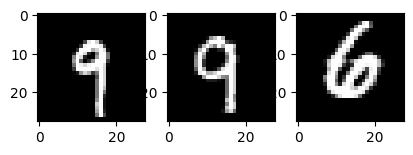

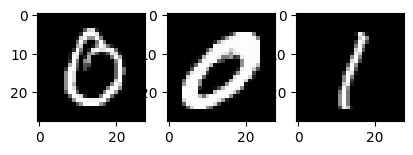

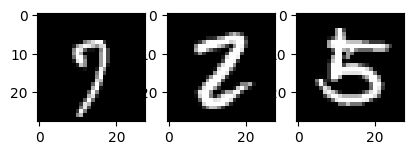

In [2]:
import matplotlib.pyplot as plt
import random
for i in range(1,4,1):
    for j in range(1,4,1):
        plt.subplot(i,4,j)
        plt.imshow(x_train[random.randint(0,60000)],cmap="gray")
    plt.show()

In [3]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(-1,28,28,1)/255.
x_test = x_test.reshape(-1,28,28,1)/255.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# x_train,x_test에는 (28,28) -> (28,28,1) 로 모양을 변경
# 이 작업을 해야 후에 Conv2D레이어에 인풋으로 넣을수 있다. 또한 0~255 값의 범위를 0~1로 바꿔줬다.

# 반면에 y_train,y_test 에는 to_categorical 이라는 함수를 사용해 줫는데 이는 onehot 벡터로 만들기 위해서이다.
# 예를들어, 5 -> [0,0,0,0,0,1,0,0,0,0] 0 -> [1,0,0,0,0,0,0,0,0,0] 이런식으로 값을 바꾸는 것입니다.

In [4]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization,Conv2D

In [5]:
model = Sequential()
model.add(Conv2D(32,(2,2),activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(64,(2,2),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128,(2,2),2,activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(32,(2,2),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(64,(2,2),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128,(2,2),2,activation="relu"))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [6]:
model.compile(loss = "categorical_crossentropy",optimizer = "adam",metrics=["acc"])
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=256)

Epoch 1/30
235/235 [==============================] - 104s 435ms/step - loss: 0.1331 - acc: 0.9588 - val_loss: 0.8292 - val_acc: 0.7512
Epoch 2/30
235/235 [==============================] - 102s 433ms/step - loss: 0.0334 - acc: 0.9898 - val_loss: 0.1489 - val_acc: 0.9489
Epoch 3/30
235/235 [==============================] - 102s 436ms/step - loss: 0.0187 - acc: 0.9938 - val_loss: 0.0376 - val_acc: 0.9891
Epoch 4/30
235/235 [==============================] - 101s 432ms/step - loss: 0.0152 - acc: 0.9949 - val_loss: 0.0502 - val_acc: 0.9870
Epoch 5/30
235/235 [==============================] - 108s 460ms/step - loss: 0.0124 - acc: 0.9959 - val_loss: 0.0396 - val_acc: 0.9896
Epoch 6/30
235/235 [==============================] - 109s 466ms/step - loss: 0.0075 - acc: 0.9972 - val_loss: 0.0562 - val_acc: 0.9874
Epoch 7/30
235/235 [==============================] - 114s 486ms/step - loss: 0.0089 - acc: 0.9969 - val_loss: 0.0457 - val_acc: 0.9894
Epoch 8/30
235/235 [============================

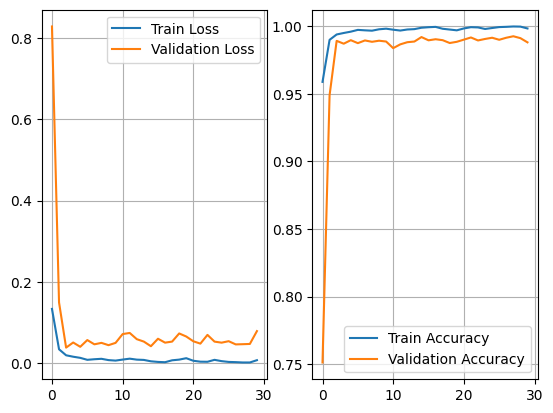

In [7]:
loss = history.history["loss"]
acc = history.history["acc"]
val_loss = history.history["val_loss"]
val_acc = history.history["val_acc"]
plt.subplot(1,2,1)
plt.plot(range(len(loss)),loss,label = "Train Loss")
plt.plot(range(len(val_loss)),val_loss,label = "Validation Loss")
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(len(acc)),acc,label = "Train Accuracy")
plt.plot(range(len(val_acc)),val_acc,label = "Validation Accuracy")
plt.grid()
plt.legend()
plt.show()

1/1 [==============================] - 0s 20ms/step
Actual : 1	Predict : 1


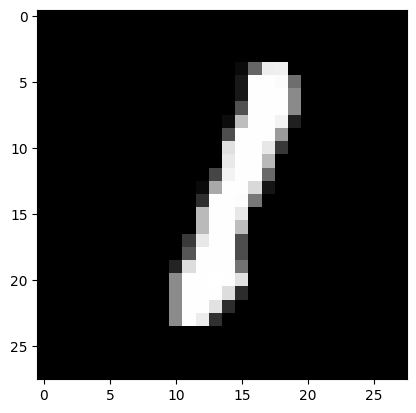

In [10]:
index = random.randint(0,9999)
plt.imshow(x_test[index],cmap="gray")
predict = model.predict(x_test[index].reshape(1,28,28,1))
print("Actual : {}\tPredict : {}".format(np.argmax(y_test[index]),np.argmax(predict)),)

In [11]:
wrong_index_list=[]
predict = model.predict(x_test)
for index in range(10000):
    if np.argmax(y_test[index]) != np.argmax(predict[index]):
        wrong_index_list.append(index)
print(wrong_index_list)
print("총 틀린 갯수 : ",len(wrong_index_list))

313/313 [==============================] - 4s 13ms/step
[8, 247, 321, 340, 445, 582, 659, 674, 684, 716, 846, 947, 956, 1014, 1039, 1112, 1175, 1226, 1232, 1242, 1299, 1319, 1364, 1393, 1522, 1530, 1549, 1621, 1678, 1790, 1838, 2035, 2070, 2118, 2130, 2135, 2225, 2280, 2314, 2380, 2387, 2447, 2462, 2488, 2496, 2597, 2635, 2654, 2810, 2896, 2939, 3111, 3267, 3289, 3422, 3520, 3558, 3647, 3726, 3727, 3778, 3780, 3871, 3941, 4027, 4176, 4199, 4201, 4238, 4271, 4360, 4497, 4500, 4507, 4639, 4699, 4740, 4783, 4814, 4823, 4860, 4943, 4951, 5502, 5634, 5937, 5981, 5997, 6042, 6093, 6560, 6597, 6625, 6651, 7098, 7240, 7338, 7447, 7539, 8059, 8095, 8102, 8217, 8255, 8325, 9209, 9478, 9490, 9620, 9627, 9637, 9664, 9669, 9679, 9729, 9792, 9839, 9850, 9906, 9922]
총 틀린 갯수 :  120


Actual : 0	Predict : 0


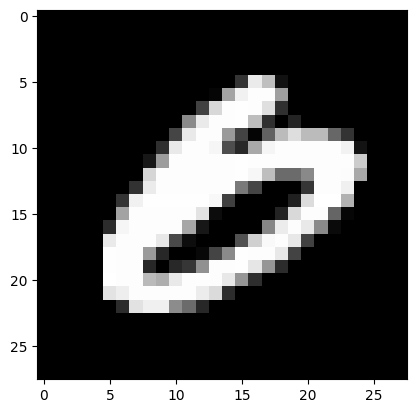

In [12]:
new_index = random.choice(wrong_index_list)
plt.imshow(x_test[new_index],cmap="gray")
print("Actual : {}\tPredict : {}".format(np.argmax(y_test[new_index]),np.argmax(new_index)),)